In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style="whitegrid")
from sklearn import linear_model
from pylab import*

In [2]:
horm_df = pd.read_excel("data_bases/lineal_horm.xlsx")
horm_df.head()

,lote,horas,monto
0,A,99,25.8
1,A,152,20.5
2,A,293,14.3
3,A,155,23.2
4,A,196,20.6


In [3]:
horm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   lote    27 non-null     object 
 1   horas   27 non-null     int64  
 2   monto   27 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 776.0+ bytes


In [4]:
# Creamos el training set
X = horm_df[["horas"]]
y = horm_df[["monto"]]

# Nuestro modelo
reg_model = linear_model.LinearRegression()
reg_model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [5]:
reg_model.coef_

array([[-0.0574463]])

In [6]:
reg_model.intercept_

array([34.16752817])

In [7]:
Y_pred = reg_model.predict(X) 
Y_pred

array([[28.4803446 ],
       [25.43569077],
       [17.33576266],
       [25.26335188],
       [22.90805363],
       [31.12287434],
       [23.59740921],
       [24.3442111 ],
       [31.18032064],
       [12.56771986],
       [12.05070318],
       [11.0741161 ],
       [32.50158551],
       [29.80160947],
       [17.16342376],
       [25.49313707],
       [23.9995333 ],
       [22.16125175],
       [27.33141863],
       [23.36762402],
       [27.56120382],
       [29.11225389],
       [30.83564285],
       [31.35265954],
       [25.55058337],
       [28.02077421],
       [26.98674084]])

In [8]:
y_estim = Y_pred.reshape(-1)
y_estim

array([28.4803446 , 25.43569077, 17.33576266, 25.26335188, 22.90805363,
       31.12287434, 23.59740921, 24.3442111 , 31.18032064, 12.56771986,
       12.05070318, 11.0741161 , 32.50158551, 29.80160947, 17.16342376,
       25.49313707, 23.9995333 , 22.16125175, 27.33141863, 23.36762402,
       27.56120382, 29.11225389, 30.83564285, 31.35265954, 25.55058337,
       28.02077421, 26.98674084])

In [9]:
x = X.to_numpy().reshape(-1)
x

array([ 99, 152, 293, 155, 196,  53, 184, 171,  52, 376, 385, 402,  29,
        76, 296, 151, 177, 209, 119, 188, 115,  88,  58,  49, 150, 107,
       125])

In [10]:
y_real = y.to_numpy()
y_real = y_real.reshape(-1)
y_real
n = len(y_real)
y_real

array([25.8, 20.5, 14.3, 23.2, 20.6, 31.1, 20.9, 20.9, 30.4, 16.3, 11.6,
       11.8, 32.5, 32. , 18. , 24.1, 26.5, 25.8, 28.8, 22. , 29.7, 28.9,
       32.8, 32.5, 25.4, 31.7, 28.5])

In [11]:
# Obtenemos los residuos
residuals = y_real-y_estim
residuals

array([-2.68034460e+00, -4.93569077e+00, -3.03576266e+00, -2.06335188e+00,
       -2.30805363e+00, -2.28743430e-02, -2.69740921e+00, -3.44421110e+00,
       -7.80320642e-01,  3.73228014e+00, -4.50703175e-01,  7.25883902e-01,
       -1.58551177e-03,  2.19839053e+00,  8.36576241e-01, -1.39313707e+00,
        2.50046670e+00,  3.63874825e+00,  1.46858137e+00, -1.36762402e+00,
        2.13879618e+00, -2.12253889e-01,  1.96435715e+00,  1.14734046e+00,
       -1.50583369e-01,  3.67922579e+00,  1.51325916e+00])

Recordemos que se puede obtener el error estándar del estimador de la siguiente manera
$$
\begin{equation}
\hat{se}_{\beta}=\sqrt{\frac{\sum_{i} \epsilon_{i}^{2}}{(n-2)\sum_{i}(x-\bar{x})^{2}}}
\end{equation}
$$

In [12]:
den=sum((x-np.mean(x))**2)
num=sum(residuals**2)/(n-2)
err_reg=np.sqrt(num/den)

print(f"El error estándar es : {err_reg}")

El error estándar es : 0.0044641731603115384


(array([ 5., 10., 15., 20., 25., 30., 35.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

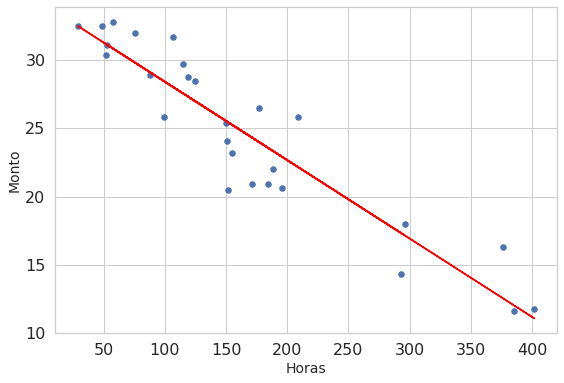

In [13]:
# Visualización
fig, ax = plt.subplots(figsize=(9,6))
plt.scatter(X, y,s=30)
plt.plot(X, Y_pred, color='red')
plt.xlabel("Horas",size=14)
plt.ylabel("Monto",size=14)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

### Calculemos el error estandar de las estimaciones de los parámetros haciendo bootstrap sobre los residuales

In [14]:
residuals_df = pd.DataFrame(residuals, columns=['residual'])
residuals_df["x"] = x
residuals_df.head()

,residual,x
0,-2.680345,99
1,-4.935691,152
2,-3.035763,293
3,-2.063352,155
4,-2.308054,196


In [15]:
r_i= np.random.choice(residuals,len(residuals),replace=True)
residuals_df_aux = pd.DataFrame(r_i, columns=['residual'])
residuals_df_aux = pd.merge(residuals_df_aux, residuals_df, how="inner", on=["residual"])
residuals_df_aux    

,residual,x
0,-0.450703,385
1,3.638748,209
2,3.638748,209
3,1.964357,58
4,1.964357,58
5,2.138796,115
6,2.138796,115
7,1.147340,49
8,-3.035763,293
9,-3.444211,171


In [16]:
x_j = residuals_df_aux[["x"]].to_numpy().reshape(-1)
den = sum((x_j-np.mean(x_j))**2)
num = sum(r_i**2)/(n)
err = np.sqrt(num/den)

print(f"El error estándar es: {err}")

El error estándar es: 0.004322416635408928


In [17]:
simul=1000
res_boost= np.array( [ ])
for i in range(0,simul):
    r_i=np.random.choice(residuals,len(residuals),replace=True)
    df_aux = pd.DataFrame(r_i,
                 columns=['residual'])
    df_aux=pd.merge(df_aux, residuals_df, how="inner", on=["residual"])
    df_aux
    x_i=df_aux[["x"]].to_numpy().reshape(-1)
    den=sum((x_i-np.mean(x_i))**2)
    num=sum(r_i**2)/(n)
    err=np.sqrt(num/den)
    res_boost = np.append(res_boost,err)

Error Estándar sin Bootsrap: 0.0044641731603115384
Promedio de Error Estándar de la muestras Bootstrap: 0.004558196701093493
Promedio de Error Estándar de la muestras Bootstrap: 0.004558196701093493
( 0.003046108181718769 , 0.006839783709913065 )


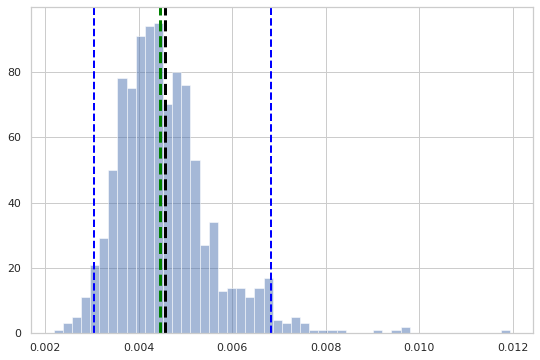

In [18]:
fig, ax = plt.subplots(figsize=(9,6))
plt.hist(res_boost,bins=50,alpha=0.5,edgecolor="white",label="Error estándar Boostrap")
plt.axvline(x=err_reg,color='green', linestyle='--',linewidth=3,label="Error Estándar de b_1 con regresión$")
plt.axvline(x=np.mean(res_boost),color='black', linestyle='--',linewidth=3,label="Promedio error estándar de b_1 con  Boostrap$")

plt.axvline(percentile(res_boost,2.5),color="blue",linestyle="--",linewidth=2)                                                                                                                                                    
plt.axvline(percentile(res_boost,97.5),color="blue",linestyle="--",linewidth=2) 

print("Error Estándar sin Bootsrap:", err_reg)
print("Promedio de Error Estándar de la muestras Bootstrap:", np.mean(res_boost))
print("Promedio de Error Estándar de la muestras Bootstrap:", np.mean(res_boost))
print("(", percentile(res_boost,2.5),",", percentile(res_boost,97.5),")")

# Calcular error estándar a partir de las betas

Haremos n simulaciones de muestras bootstrap del mismo tamaño que los datos con los que contamos y con cada una de ellas  calculamos un estimador para la betas de la regresión lineal de monto vs horas

In [19]:
def generate_boostrap_sim(n, data_frame):
    X = data_frame[["horas"]].to_numpy().reshape(-1)
    
    y_s = []
    
    for _ in range(n):
        ri = np.random.choice(X, len(X), replace=True)
        aux_df = pd.DataFrame(ri, columns=['horas'])
        aux_df = pd.merge(aux_df, data_frame ,how="inner", on=['horas'])
        
        Xi = aux_df[["horas"]]
        yi = aux_df[["monto"]]
        
        regi = linear_model.LinearRegression() 
        regi.fit(Xi,yi)
        
        y_s.append(regi)
        
    return y_s

In [20]:
n = 1000
lineal_regressions = generate_boostrap_sim(n, horm_df)

In [21]:
def get_standar_errors_model(lineal_regressions_list, X, y):
    std_errors = []
    
    x = X.to_numpy().reshape(-1)
    y_real = y.to_numpy()
    y_real = y_real.reshape(-1)
    n=len(y_real)
    
    for model in lineal_regressions_list:
        
        Y_pred = model.predict(X)
        y_estim = Y_pred.reshape(-1)
        
        residual=y_real-y_estim

        
        den = sum((x-np.mean(x))**2)
        num = sum(residual**2)/(n-2)
        err_reg = np.sqrt(num/den)
        
        std_errors.append(err_reg)
        
        
    return std_errors
        

In [22]:
# Obtenemos el error estandar para cada uno de los modelos
std_error = get_standar_errors_model(lineal_regressions, X, y)

In [23]:
def generate_hist(data):
    fig, ax=subplots(figsize=(8,5))
    sns.histplot(data)
    plt.axvline(x=np.mean(data),color='red', linestyle='--',linewidth=3,label="Promedio error estándar con  Boostrap$")
    axvline(percentile(new_betas,2.5),color="blue",linestyle="--",linewidth=2)                                                                                                                                                    
    axvline(percentile(new_betas,97.5),color="blue",linestyle="--",linewidth=2) 


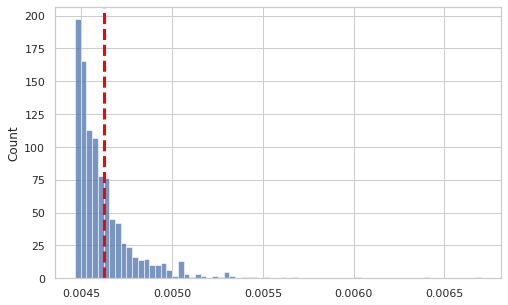

In [24]:
generate_hist(std_error)

In [25]:
# Ahora obtenemos el error estandar para las betas
def get_betas(lineal_regressions_list):
    coefs, intercepts = np.array([]), np.array([])
    
    for model in lineal_regressions_list:
        coefs = np.append(coefs, model.coef_)
        intercepts = np.append(intercepts, model.intercept_)
    
    return coefs, intercepts

In [26]:
coefs, intercepts = get_betas(lineal_regressions)

In [27]:
coefs

array([-0.05943241, -0.06713047, -0.06237514, -0.06343798, -0.05576211,
       -0.05408914, -0.06256349, -0.06268569, -0.05877962, -0.06254416,
       -0.05506507, -0.0566787 , -0.05575316, -0.06079833, -0.05763225,
       -0.05906878, -0.06924624, -0.0598329 , -0.04925882, -0.05740782,
       -0.05329227, -0.0600104 , -0.05527469, -0.05281821, -0.05407844,
       -0.05590157, -0.06372014, -0.05767274, -0.05718438, -0.06413172,
       -0.06161801, -0.05115052, -0.06526705, -0.06194059, -0.05950189,
       -0.05375084, -0.05817918, -0.05670435, -0.05551373, -0.05524241,
       -0.06246832, -0.05828795, -0.05585041, -0.05848513, -0.05503152,
       -0.05559975, -0.06380499, -0.05935622, -0.05864544, -0.05655222,
       -0.06433203, -0.05855522, -0.05467936, -0.05701622, -0.06145662,
       -0.05860581, -0.06640091, -0.05654623, -0.05664591, -0.04762576,
       -0.05116053, -0.05760784, -0.05016753, -0.05614639, -0.05735071,
       -0.0546577 , -0.056675  , -0.06309176, -0.05439876, -0.06

In [28]:
intercepts

array([33.74504755, 36.05923249, 35.36759986, 34.73784901, 34.70264737,
       33.87098846, 34.90669381, 34.07060969, 34.33393125, 35.11655322,
       34.54268914, 34.32040348, 33.66228438, 34.72718186, 34.68397083,
       34.11574707, 36.23751506, 34.78674385, 31.76864723, 34.2905243 ,
       33.50393149, 34.26500043, 33.68689713, 33.60716353, 34.04875856,
       33.79665822, 34.61892452, 34.11929054, 34.00893154, 34.6650565 ,
       34.47984286, 33.37531976, 34.95000974, 35.04183692, 34.02505922,
       33.62201458, 34.57559938, 34.59966917, 33.87763517, 32.81372422,
       35.17291028, 34.17446206, 33.4651099 , 34.38565277, 33.57861813,
       33.62643574, 34.83044319, 34.54794509, 33.77459682, 33.56410691,
       34.91848904, 33.70204295, 33.03757734, 34.64927651, 34.97041519,
       34.34302694, 35.98762391, 34.45761789, 33.98600841, 31.5728461 ,
       32.58829201, 34.58002038, 32.32393916, 33.55673945, 33.79763585,
       33.89002959, 34.36682452, 34.87658598, 32.61462025, 35.54

In [29]:
betas_dicc = {'coef':coefs, 'intercept':intercepts}
betas = pd.DataFrame(betas_dicc)

betas.head()

,coef,intercept
0,-0.059432,33.745048
1,-0.067130,36.059232
2,-0.062375,35.367600
3,-0.063438,34.737849
4,-0.055762,34.702647


In [30]:
def get_standar_error_betas(data_frame, beta, n):
    media_betas=np.mean(data_frame[beta])
    
    num= np.sum((data_frame[beta]-media_betas)**2)
    denom = n-1
    
    se_betas = np.sqrt(num/denom)

    return media_betas/se_betas

In [31]:
err_coefs = get_standar_error_betas(betas, 'coef', n)
err_intercepts = get_standar_error_betas(betas, 'intercept', n)

In [32]:
print(f"Los errores son: {err_coefs}, {err_intercepts}")

Los errores son: -14.207661969333529, 46.25149152887066


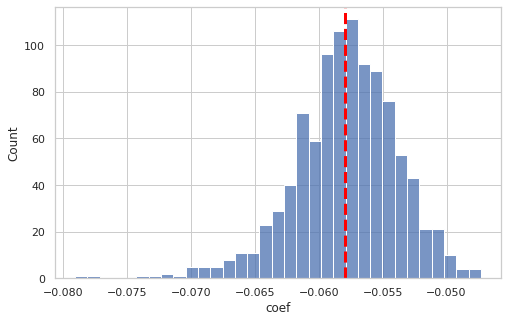

In [33]:
generate_hist(betas['coef'])

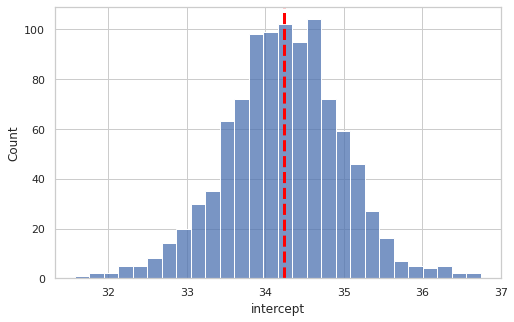

In [34]:
generate_hist(betas['intercept'])